
# Assignment 0

## Regularization 1.1

Using the accompanying Hitters dataset (found here (Links to an external site.)Links to an external site.), we will explore regression models to predict a player's Salary from other variables. You can use any programming languages or frameworks that you wish.

1.1 Use LASSO regression to predict Salary from the other numeric predictors (you should omit the categorical predictors).

1.1.1. Create a visualization of the coefficient trajectories

1.1.2. Comment on which are the final three predictors that remain in the model

1.1.3. Use cross-validation to find the optimal value of the regularization penalty

1.1.4. How many predictors are left in that model?



### 1.1 Use LASSO regression to predict Salary from the other numeric predictors (you should omit the categorical predictors).

In [1]:

import pandas as pd
import numpy as np
from sklearn.linear_model import *


# read in data
hitters_df = pd.read_csv("Hitters.csv", index_col = 0)
#hitters_df[0:5]
# drop categorical variables
df = hitters_df.dropna().drop(['League','Division','NewLeague'], axis=1)
#df[0:5]
# get X and Y
X = df.drop(['Salary'], axis=1)
Y = df['Salary']

lasso_reg = Lasso(normalize=True)

lasso_reg.fit(X,Y)

lasso_reg.coef_

pred = lasso_reg.predict(X)

mse = np.mean((pred - Y)**2)

print('mse:',mse)

lasso_reg.score(X,Y)


mse: 108955.42067407088


0.4625702841142737

### 1.1.1. Create a visualization of the coefficient trajectories

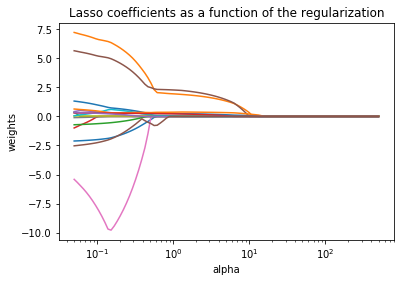

In [2]:


import matplotlib.pyplot as plt

# get an alphas array
alphas = 10**np.linspace(3,-1,100)*0.5

lasso = Lasso(normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X, Y)
    coefs.append(lasso.coef_)


ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.show()


In [3]:
coefs[0] # all zeros

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0., -0.])

### 1.1.2. Comment on which are the final three predictors that remain in the model

**Answer:** After running the code below, we can know the final three predictors that remain in the model are **Hits, CRuns, and CRBI.**


In [4]:

print(coefs[42])
df.columns

[ 0.          0.31599303  0.          0.          0.          0.          0.
  0.          0.          0.          0.07570179  0.2031687   0.          0.
  0.          0.        ]


Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors', 'Salary'],
      dtype='object')

### 1.1.3. Use cross-validation to find the optimal value of the regularization penalty

In [6]:
lasso_cv = LassoCV(alphas = alphas, normalize = True, cv = 10)
lasso_cv.fit(X, Y)
print('Best alpha:', lasso_cv.alpha_)

pd.Series(lasso_cv.coef_, index = X.columns)

Best alpha: 0.0660970574233


AtBat     -2.076869
Hits       7.012882
HmRun      0.000000
Runs      -0.636252
RBI        0.488938
Walks      5.490365
Years     -6.229963
CAtBat    -0.084233
CHits      0.000000
CHmRun     0.169083
CRuns      1.211489
CRBI       0.576082
CWalks    -0.685997
PutOuts    0.292508
Assists    0.301917
Errors    -2.437446
dtype: float64

### 1.1.4. How many predictors are left in that model?

**Answer: ** Total 14 predictors are left in the model. 

## Regularization 1.2

Using the accompanying Hitters dataset (found here (Links to an external site.)Links to an external site.), we will explore regression models to predict a player's Salary from other variables. You can use any programming languages or frameworks that you wish.

1.2 Repeat with Ridge Regression. 

1.2.1 Visualize the coefficient trajectories

1.2.2 Use cross-validation to find the optimal value of the regularization penalty



### 1.2 Repeat with Ridge Regression.

In [7]:

ridge_reg = Ridge(normalize=True)

ridge_reg.fit(X,Y)

ridge_reg.coef_

pred = ridge_reg.predict(X)

mse = np.mean((pred - Y)**2)

print('mse:',mse)

ridge_reg.score(X,Y)

mse: 113890.20436157893


0.43822914184959982

### 1.2.1 Visualize the coefficient trajectories

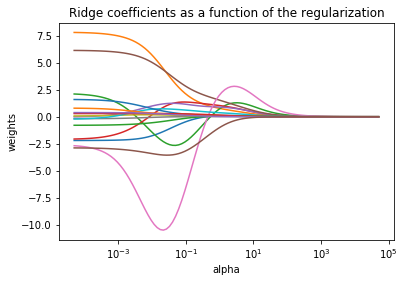

In [8]:

# get an alphas array
alphas = 10**np.linspace(5,-4,100)*0.5

ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, Y)
    coefs.append(ridge.coef_)


ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.show()


In [9]:
coefs[0] # not all zeros

array([  2.41757810e-05,   8.76977514e-05,   3.53363259e-04,
         1.48302561e-04,   1.56652708e-04,   1.84373057e-04,
         7.53977948e-04,   2.07570515e-06,   7.63923133e-06,
         5.76102360e-05,   1.53260064e-05,   1.58167748e-05,
         1.67338464e-05,   9.68377118e-06,   1.58169502e-06,
        -7.37724502e-06])

### 1.2.2 Use cross-validation to find the optimal value of the regularization penalty

In [10]:
ridge_cv = RidgeCV(alphas = alphas, normalize = True, cv = 10)
ridge_cv.fit(X, Y)
print('Best alpha:', ridge_cv.alpha_)

pd.Series(ridge_cv.coef_, index = X.columns)

Best alpha: 0.93690871143


AtBat      0.090014
Hits       0.791378
HmRun      0.672607
Runs       1.047277
RBI        0.900298
Walks      1.558829
Years      1.913234
CAtBat     0.011271
CHits      0.053724
CHmRun     0.375058
CRuns      0.108234
CRBI       0.111951
CWalks     0.065443
PutOuts    0.152927
Assists    0.026209
Errors    -1.055195
dtype: float64

## Short Answer

2.1 Explain in your own words the bias-variance tradeoff

2.2 What role does regularization play in this tradeoff? 

2.3 Make reference to your findings in number (1) to describe models of high/low bias and variance


### 2.1 Explain in your own words the bias-variance tradeoff

**Answer: ** When a model is very flexible, which means that it has really high variance, then this model will have pretty low bias since it's flexible enough to follow the data trend. However, when a model is not very flexible, which means that it has low variance, then this model will have quite high bias because of its inflexibility.  


### 2.2 What role does regularization play in this tradeoff?

**Answer: ** When bias is very low and variance is very high, it is likely that your model is overfitting. However, regularization can effectively prevent overfitting. Including regularization while training the model, the model won't be too flexible with high variance and low bias. Instead, regularization will help to find the best point to stop increasing flexibility to avoid overfitting.  


### 2.3 Make reference to your findings in number (1) to describe models of high/low bias and variance

**Answer: ** Looking at two plots of **coefficients as a function of the regularization**, when the regularization parameter is small, all coefficients are quite large, which means that the model has high variance and at the same time, it has pretty low bias. However, the model might be overfitting. When the regularization parameter is large, all coefficients become smaller, which means that the model has low variance and at the same time, it has relatively high bias. 

